In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df_uso_internet = pd.read_csv('indice_uso_internet_regioes.csv')

In [285]:
df_uso_internet = df_uso_internet.pivot(
    index='Grande Região',
    columns='Ano',
    values='Escala'
)

In [286]:
df_densidade_demo = pd.read_excel('densidade_demografica.xlsx')

In [287]:
sul = [
    'Rio Grande do Sul',
    'Santa Catarina',
    'Paraná'
]
df_densidade_demo_sul = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(sul)].reset_index(drop=True)
df_densidade_demo_sul['habitantes por km²'] = df_densidade_demo_sul['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_sul['habitantes por km²'] = df_densidade_demo_sul['habitantes por km²'].astype(float)
df_densidade_demo_sul['habitantes por km²'].skew()

np.float64(0.24054375375340448)

In [288]:
sudeste = [
    'Espírito Santo',
    'São Paulo',
    'Minas Gerais',
    'Rio de Janeiro'
]
df_densidade_demo_sudeste = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(sudeste)].reset_index(drop=True)
df_densidade_demo_sudeste['habitantes por km²'] = df_densidade_demo_sudeste['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_sudeste['habitantes por km²'] = df_densidade_demo_sudeste['habitantes por km²'].astype(float)
df_densidade_demo_sudeste['habitantes por km²'].skew()

np.float64(1.1188286857049838)

In [289]:
centro_oeaste = [
    'Mato Grosso',
    'Mato Grosso do Sul',
    'Goiás'
]
df_densidade_demo_co = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(centro_oeaste)].reset_index(drop=True)
df_densidade_demo_co['habitantes por km²'] = df_densidade_demo_co['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_co['habitantes por km²'] = df_densidade_demo_co['habitantes por km²'].astype(float)
df_densidade_demo_co['habitantes por km²'].skew()

np.float64(1.397159606368654)

In [290]:
nordeste = [
    'Alagoas',
    'Sergipe',
    'Bahia',
    'Rio Grande do Norte',
    'Piauí',
    'Ceará',
    'Maranhão',
    'Pernambuco',
    'Paraíba'
]
df_densidade_demo_ne = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(nordeste)].reset_index(drop=True)
df_densidade_demo_ne['habitantes por km²'] = df_densidade_demo_ne['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_ne['habitantes por km²'] = df_densidade_demo_ne['habitantes por km²'].astype(float)
df_densidade_demo_ne['habitantes por km²'].skew()

np.float64(-0.06078049860569931)

In [291]:
norte = [
    'Roraima',
    'Rôndonia',
    'Pará',
    'Amazonas',
    'Tocantis'
]
df_densidade_demo_norte = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(norte)].reset_index(drop=True)
df_densidade_demo_norte['habitantes por km²'] = df_densidade_demo_norte['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_norte['habitantes por km²'] = df_densidade_demo_norte['habitantes por km²'].astype(float)
df_densidade_demo_norte['habitantes por km²'].skew()

np.float64(1.6915443448609653)

In [292]:
mediana_norte = df_densidade_demo_norte['habitantes por km²'].median()
mediana_ne = df_densidade_demo_ne['habitantes por km²'].median()
mediana_sudeste = df_densidade_demo_sudeste['habitantes por km²'].median()
mediana_co = df_densidade_demo_co['habitantes por km²'].median()
mediana_sul = df_densidade_demo_sul['habitantes por km²'].median()

In [293]:
densidades = [
    mediana_co,
    mediana_ne,
    mediana_norte,
    mediana_sudeste,
    mediana_sul
]

In [294]:
df_wide = df_uso_internet.copy().reset_index()

In [295]:
df_wide = df_wide.iloc[:, [0, 6]]

In [296]:
df_wide['Densidade Demográfica'] = densidades

In [297]:
df_populacao = pd.read_excel('população_residente.xlsx')

In [298]:
df_populacao

,Posição no Ranking,Unidade da Federação,População Residente,Unidade
0,1,São Paulo,44411238,pessoas
1,2,Minas Gerais,20539989,pessoas
2,3,Rio de Janeiro,16055174,pessoas
3,4,Bahia,14141626,pessoas
4,5,Paraná,11444380,pessoas
5,6,Rio Grande do Sul,10882965,pessoas
6,7,Pernambuco,9058931,pessoas
7,8,Ceará,8794957,pessoas
8,9,Pará,8120131,pessoas
9,10,Santa Catarina,7610361,pessoas


In [299]:
df_populacao = df_populacao.iloc[:, [1,2]]

In [300]:
populacao_norte = df_populacao[df_populacao['Unidade da Federação'].isin(norte)]['População Residente'].sum()
populacao_ne = df_populacao[df_populacao['Unidade da Federação'].isin(nordeste)]['População Residente'].sum()
populacao_sudeste = df_populacao[df_populacao['Unidade da Federação'].isin(sudeste)]['População Residente'].sum()
populacao_co = df_populacao[df_populacao['Unidade da Federação'].isin(centro_oeaste)]['População Residente'].sum()
populacao_sul = df_populacao[df_populacao['Unidade da Federação'].isin(sul)]['População Residente'].sum()

In [301]:
populacao_regioes = [
    populacao_co,
    populacao_ne,
    populacao_norte,
    populacao_sudeste,
    populacao_sul
]

In [302]:
df_wide['População Total'] = populacao_regioes

In [303]:
df_wide = df_wide.rename(columns={2022: 'Índice do Uso de Internet'})

In [304]:
df_wide = df_wide.iloc[:, [1,2,3]]

In [305]:
corr = df_wide.corr(method='pearson')

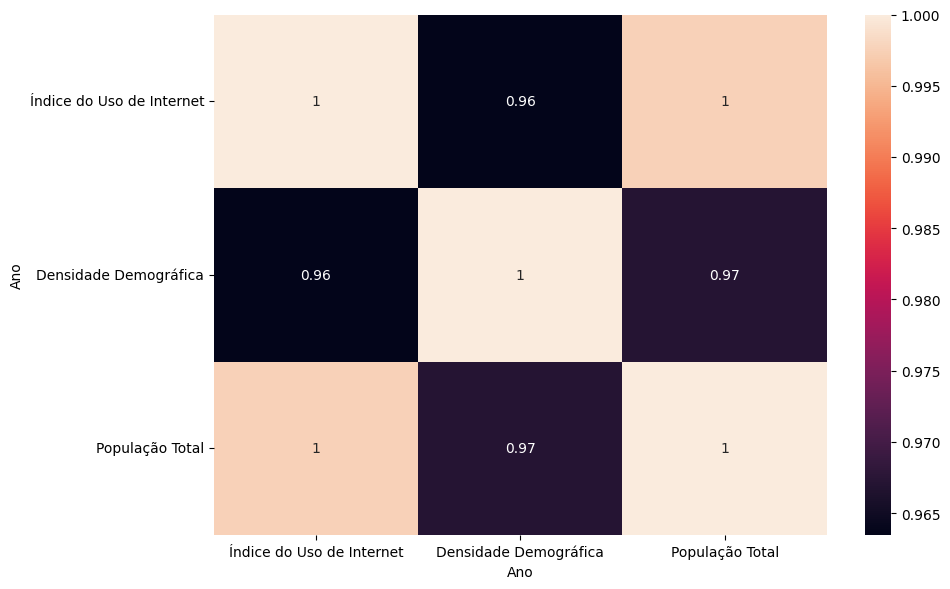

In [306]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr, annot=True)

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/internet/correlacao2.png')
plt.tight_layout()
plt.show()